In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/prepared_data.csv')
df.head()

,ownerSex,ownerBirthday,accountCreationDate,isShared,balance,loanDate,loanDuration,loanPayments,loanAmount,ratio,...,hasCard,frequency_monthly issuance,frequency_weekly issuance,region_central Bohemia,region_east Bohemia,region_north Bohemia,region_north Moravia,region_south Bohemia,region_south Moravia,region_west Bohemia
0,0,-7.083936e+08,732758400.0,0,20100.0,741830400.0,12,8033,96396,9.989223,...,False,0,1,0,0,0,0,0,0,1
1,1,-4.561920e+07,729561600.0,0,52208.9,742348800.0,36,4610,165960,19.830326,...,False,1,0,0,1,0,0,0,0,0
2,1,-1.059782e+09,729129600.0,0,20272.8,743817600.0,60,2118,127080,15.146603,...,False,1,0,0,1,0,0,0,0,0
3,0,-9.372672e+08,728352000.0,0,34307.3,744336000.0,36,2939,105804,12.086361,...,False,1,0,1,0,0,0,0,0,0
4,1,2.739744e+08,729648000.0,0,41142.9,747273600.0,60,4579,274740,21.907344,...,False,0,1,0,0,0,0,0,0,0


In [3]:
X, y = df.drop('status',axis=1), df['status']

In [4]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_r, columns=['pc1', 'pc2'])
pca_df = pd.concat([pca_df, df[['status']]], axis = 1)

In [5]:
pca_df.head()

,pc1,pc2,status
0,3.682314e+08,-6.986876e+07,1
1,-2.945408e+08,-7.332439e+07,0
2,7.196133e+08,-7.032152e+07,0
3,5.970973e+08,-7.080324e+07,0
4,-6.141479e+08,-7.058428e+07,0


<AxesSubplot: xlabel='pc1', ylabel='pc2'>

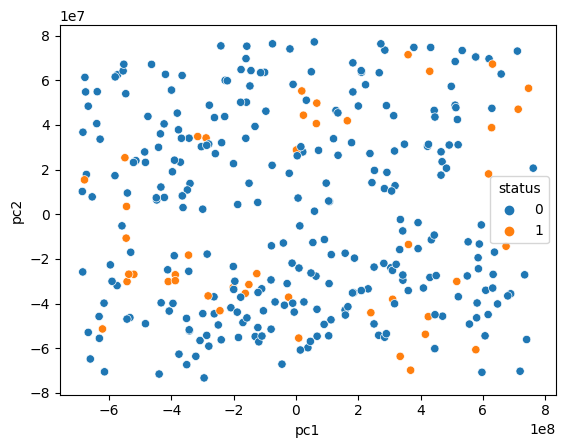

In [6]:
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='status')

In [7]:
scaled_df = df.copy()
scaler = StandardScaler()
scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(data=scaler.fit_transform(scaled_df), columns=df.columns)

<AxesSubplot: xlabel='pc1', ylabel='pc2'>

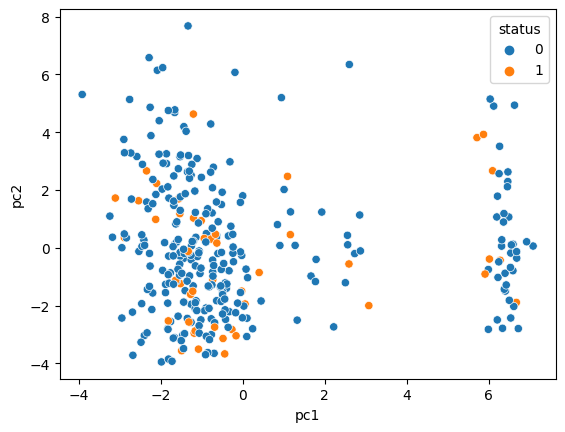

In [8]:
pca = PCA(n_components=2,svd_solver='full')
X, y = scaled_df.drop('status',axis=1), scaled_df['status']
X_r = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_r, columns=['pc1', 'pc2'])
pca_df = pd.concat([pca_df, df[['status']]], axis = 1)
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='status')